In [95]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [96]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

import time
import matplotlib.animation
import matplotlib.pyplot as plt
from IPython import display

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('animation', html='jshtml')

In [97]:
a = np.linspace(0, 2*np.pi, 16, endpoint = False)
a

array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357, 3.14159265, 3.53429174,
       3.92699082, 4.3196899 , 4.71238898, 5.10508806, 5.49778714,
       5.89048623])

In [98]:
np.where(a < 0.8)[0][-1]

2

In [99]:
np.pi/16

0.19634954084936207

In [100]:

    
    def get_velocity_xy(self):
        #get_projection = scalar              
        u = self.get_projection(self.true_wind_direction, self.wing_direction)
        #self.norm() returns VECTOR
        p = u*self.norm(self.wing_direction)
#         to p einai h probolh tou self.true_wind_direction panw sto dianysma pou deixnei kateythinsi tou wing
#         p = np.inner(self.true_wind_direction, self.wing_direction)/np.linalg.norm(self.wing_direction) * (self.wing_direction/np.linalg.norm(self.wine_direction))
        return [p, self.true_wind_direction - p]
# heading vector = self.true_wind_direction - p 
   

    def norm(v):
        #otan to dianysma exei sxedon 0 norm, epistrefei to (0,0)
        if np.linalg.norm(v) < 0.00001:
            return np.array([0,0])
        #alliws to normalized vector
        return v/np.linalg.norm(v)


    def get_projection(v1, v2):
        #used to project v1 onto v2 vector
        return np.inner(v1, v2)/np.linalg.norm(v2)


In [101]:
v1 = np.array([2,4])
v2 = np.array([3,8])

In [102]:
u = get_projection(v1, v2)
u * norm(v2)

array([1.56164384, 4.16438356])

In [103]:
np.cross(v2, u * norm(v2))

array(0.)

In [104]:
np.inner(v1,v2)/np.linalg.norm(v2) * (v2/np.linalg.norm(v2))

array([1.56164384, 4.16438356])

In [105]:
class SailBoat:

    def __init__(self):
        self.observation_space_n = 16 # 360//36 # 4 pithanes directions true wind * 4 pithanes directions (current pos -> target): ok!
        self.action_space_n = 16  # 360//36 ok!
        
        self.wing_range = np.pi #ok!
        # self.wing_angles = np.linspace(np.pi, 2*np.pi, self.action_space_n, endpoint = False)
        self.wing_actions = self.wing_range/self.action_space_n #OK 
        
        self.state_range = 2*np.pi
        self.states = np.linspace(0, self.state_range, self.observation_space_n, endpoint = False) # 4 pithanes directions aera * 4 pithanes directions (current pos -> target): ok
        
        self.field_size = [-100,100]      #ok! 


    def reset(self):        
        self.iterations = 1
        self.total_reward = 0
        
        self.position = np.array([np.random.uniform(low=-100, high=100),np.random.uniform(low=-100, high=100)])

        # self.position = np.array([np.random.uniform(low=-75, high=0),np.random.uniform(low=-75, high=0)])
        self.trajectory = [self.position] #self._trajectory
        self.heading = np.array([0,1])  # boad heading
        self.wing_direction = np.array([-1,0])  # wing position
        
        
        # self._target_position = np.array([np.random.uniform(low=0, high=75),np.random.uniform(low=0, high=75)])
        
#         action = self.sample()
#         self._true_wind_direction = np.array([np.cos(action*self.wing_actions), np.sin(action*self.wing_actions)])

        self.target_position = np.array([np.random.uniform(low=0, high=75),np.random.uniform(low=0, high=75)])
        
        # self.true_wind_direction = np.array([3,1])  # initial wind direction
        self.true_wind_direction = np.array([np.random.uniform(low=0, high=3),np.random.uniform(low=0, high=3)])
        self.wind_speed = 1 #etsi orizetai sthn __init__

        self.velocity = self.get_velocity_xy()
        
        self.direction = self.get_direction()
        self.state = self.get_state()
        return self.state, {'velocity': self.velocity}
    
    def sample(self):
        return np.random.randint(0, self.action_space_n)
        
    def step(self, action):
        self.iterations += 1
        angle = self.get_angle(self.true_wind_direction, self.direction)  + 3*np.pi/2

        self.wing_direction = np.array([np.cos(action*self.wing_actions+angle),
                                        np.sin(action*self.wing_actions+angle)])  
        self.velocity = self.get_velocity_xy()
        self.move()
        reward = self.reward
        self.total_reward += reward
        self.direction = self.get_direction()
        next_state = self.get_state()
        done, truncated = self.game_over()
        return next_state, reward, done, truncated
    
#     def state_action(self, state, action):
#         self.iterations += 1
#         self.true_wind_direction = self.set_wind_state(self.direction, self.states[state])     
#         angle = self.get_angle(self.true_wind_direction, self.direction)+np.pi/2
#         self.wing_direction = np.array([np.cos(action*self.wing_actions+angle), 
#                                         np.sin(action*self.wing_actions+angle)]) #self.rotate(self.wing_direction, -np.pi/8)
#         self.velocity = self.get_velocity_xy()
#         self.move()
#         reward = self.reward
#         self.total_reward += reward
#         self.direction = self.get_direction()
#         next_state = self.get_state()
#         done, truncated = self.game_over()
#         return next_state, reward, done, truncated    

    def game_over(self):
        if self.position[0] < self.field_size[0] or self.position[0] > self.field_size[1]:
            return True, False
        if self.position[1] < self.field_size[0] or self.position[1] > self.field_size[1]:
            return True, False
        if self.distance_to_target(self.position) < 1:
            return True, False
        if self.iterations > 200:
            return True, False
        return False, False
        


    
    def move(self):
        speed = self.wind_speed
#         displacement = speed*self.velocity[1]
        displacement = speed*self.norm(self.velocity[1])
        self.heading = self.velocity[1]
        new_pos = self.position + displacement
        self.trajectory.append(new_pos)
        self.reward = self.distance_to_target(self.position) - self.distance_to_target(new_pos)
        self.position = new_pos
        
    def distance_to_target(self, pos):
        return np.linalg.norm(self.target_position - pos)
    
    def get_direction(self):
        return self.target_position - self.position
    
    def get_velocity_xy(self):
        #get_projection = scalar              
        u = self.get_projection(self.true_wind_direction, self.wing_direction)
        #self.norm() returns VECTOR
        p = u*self.norm(self.wing_direction)
#         to p einai h probolh tou self.true_wind_direction panw sto dianysma pou deixnei kateythinsi tou wing
#         p = np.inner(self.true_wind_direction, self.wing_direction)/np.linalg.norm(self.wing_direction) * (self.wing_direction/np.linalg.norm(self.wine_direction))
        return [p, self.true_wind_direction - p]
# heading vector = self.true_wind_direction - p 
    
#     def set_wind_state(self, direction, angle):
#         return self.rotate(direction, angle)
    
    def get_state(self):
        angle = self.get_angle(self.true_wind_direction, self.direction)
        return self.angle_to_state(angle)
    
    def get_action(self):
        angle = self.get_angle(self.true_wind_direction, self.wing_direction)
        return self.angle_to_action(angle)
    
    def angle_to_state(self, angle):
        #Epistrefei index to self.states [to opoio exei 16 gwnies mesa tou]
        #H gwnia poy tha paroume ti deixnei????
        #Pantws einia ayth poy mpainei ws index gia tis grammes tou Q table
        if angle < 0.001: return 0
        return np.where(self.states < angle)[0][-1]
    
    def angle_to_action(self, angle):
        return (int(angle/self.wing_actions))
    
    def get_angle(self, v1, v2):
        v1 = self.norm(v1)
        v2 = self.norm(v2)
        a = np.inner(v1, v2) # = to cos(8) metaksy v1, v2 afou ta exoume kanei normalize prwta
        if abs(a) < 1:
            return np.arccos(a) #epistrefei gwnia se radian metaksy v1, v2
        return 0 #epistrefei 0 mono otan parallila (cos = +/- 1 )

#     def rotate(self, v, angle):
#         rx = v[0] * np.cos(angle) - v[1] * np.sin(angle)
#         ry = v[0] * np.sin(angle) + v[1] * np.cos(angle)
#         return np.array([rx, ry])

    def get_projection(self, v1, v2):
        #used to project v1 onto v2 vector
        return np.inner(v1, v2)/np.linalg.norm(v2)

    def norm(self, v):
        #otan to dianysma exei sxedon 0 norm, epistrefei to (0,0)
        if np.linalg.norm(v) < 0.00001:
            return np.array([0,0])
        #alliws to normalized vector
        return v/np.linalg.norm(v)
    
    def render(self, episode):
        
        fig = plt.figure(figsize=(8, 8))
        plt.clf()
        plt.cla()
        plt.text(-75, 85, f"{episode}, {self.iterations}, {self.total_reward:.3f}")
        plt.xlim(self.field_size)
        plt.ylim(self.field_size)
        plt.grid()
        
        v = np.array([4*self.norm(self.heading),
                      3*self.norm(self.wing_direction), 
                      2*self.norm(self.true_wind_direction),
                      self.velocity[0],
                      self.velocity[1]
                     ])
        #sample output of print(v)
        # [[ 2.26423276  3.29746115]
        # [-2.47309586  1.69817457]
        # [ 0.59503947  1.90943134]
        # [-0.67009059  0.46012402]
        # [ 1.48944645  2.16911967]]
        
        origin = np.array([self.position]*5).T
        plt.quiver(*np.array([-75,75]).T, v[2:3,0], v[2:3,1], color = ['k'], scale = 2, scale_units = "inches", units = "inches")
        
        plt.plot(*self.target_position, "r*", markersize = 15)
        plt.scatter(*np.array(self.trajectory).T, s=2, c = "pink")
        # green = self.heading
        # blue = self.wing_direction
        # k (mavro) = self.true_wind_direction
        # magenda = velocity[0]  == p
        # red = velocity[1] == ???
        plt.quiver(*origin, v[:,0], v[:,1], color = ['g', 'b', 'k', 'm', 'r'], scale = 2, scale_units = "inches", units = "inches")

        display.display(plt.gcf())
        display.display(plt.clf())
        display.clear_output(wait=True)

        plt.close()
        time.sleep(0.05)
    
#     def state_action_render(self, state, action):
        
#         fig = plt.figure(figsize=(6, 6))
#         plt.clf()
#         plt.text(-45, 45, f"{state}, {action}, {self.reward:.3f}")#total_reward/self.iterations:.3f}")
#         plt.xlim(self.field_size)
#         plt.ylim(self.field_size)
#         plt.grid()
        
#         v = np.array([4*self.norm(self.heading), 3*self.norm(self.wing_direction), 2*self.norm(self.true_wind_direction), self.norm(self.velocity[0]), self.norm(self.velocity[1])])
#         origin = np.array([self.position]*5).T
#         plt.plot(*self.target_position, "r*", markersize = 15)
#         plt.scatter(*np.array(self.trajectory).T, s=10, c = "b")
#         plt.quiver(*origin, v[:,0], v[:,1], color = ['g', 'b', 'k', 'm', 'r'], scale = 2, scale_units = "inches", units = "inches")
        
#         display.display(plt.gcf())
#         display.clear_output(wait=True)
#         plt.close()
#         time.sleep(0.05)

In [106]:
env = SailBoat()
# initialize Q-table with zeros
Q = -np.ones([env.observation_space_n, env.action_space_n])
rewards = []
epsilon = 1  # exploration rate
epsilons = []
i_eps = 0

In [107]:
# env = SailBoat()
# state, info = env.reset()
# #env.render(1)
# for state in range(16):
#     for action in range(16):
#         next_state, reward, done, truncated = env.state_action(state, action)
#         print(state, action, reward)
# #         env.state_action_render(state, action)
#         Q[state, action] = reward

In [108]:
# for i in range(Q.shape[0]):
#     print (",".join(f"{v:8.4f}" for v in Q[i,:]))

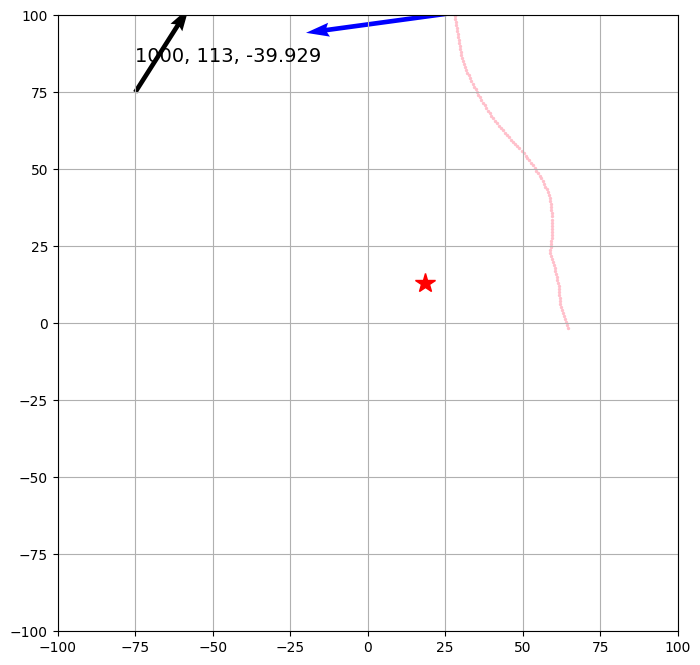

None

In [109]:
# set hyperparameters
alpha = 0.7  # learning rate
gamma = 0.95  # discount factor

decay_epsilon = 0.999
iters = 0
# run episodes
num_episodes = 1000
num_i_eps = 100
for i in range(1, num_episodes + 1):
    epsilons.append(epsilon)
    state, info = env.reset()
    done = False
    while not done:
        # choose action using epsilon-greedy policy
        if i_eps < num_i_eps:
            action = env.sample()
        elif np.random.uniform(0, 1) < epsilon:
            action = env.sample()
        else:
            action = np.argmax(Q[state, :])
        # take action and observe next state and reward
        next_state, reward, done, truncated = env.step(action) #state_action(state, action)

        # update Q-table
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        # update state
        state = next_state
        if i_eps >= num_i_eps:
            epsilon *= decay_epsilon
            if i%100 == 0: env.render(i)
    i_eps += 1
    rewards.append(env.total_reward/env.iterations)
#     Q /= np.max(Q)

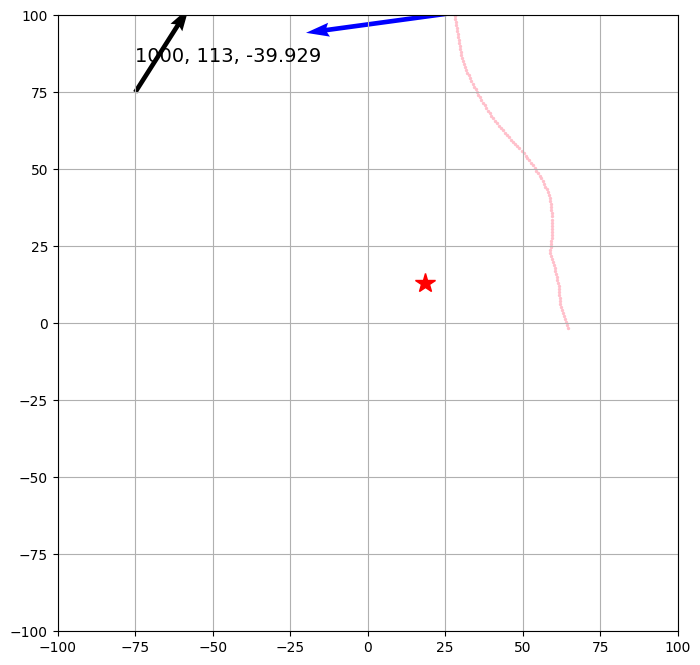

None

In [114]:
env.render(num_episodes)

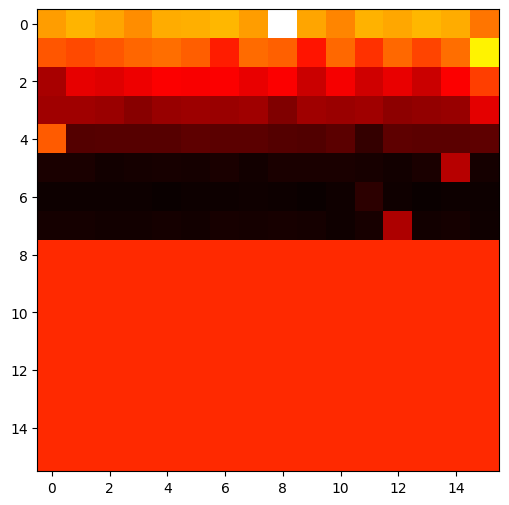

In [117]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(Q, cmap = "hot")
plt.show()

In [116]:
Q[7:,:]

array([[-10.71163177, -10.7646695 , -10.82082574, -10.86680527,
        -10.80151089, -10.84505327, -10.70104951, -10.7233093 ,
        -10.69444599, -10.75587713, -10.93874127, -10.67884887,
         -5.32521904, -10.81641738, -10.75533194, -10.92074695],
       [ -1.        ,  -1.        ,  -1.        ,  -1.        ,
         -1.        ,  -1.        ,  -1.        ,  -1.        ,
         -1.        ,  -1.        ,  -1.        ,  -1.        ,
         -1.        ,  -1.        ,  -1.        ,  -1.        ],
       [ -1.        ,  -1.        ,  -1.        ,  -1.        ,
         -1.        ,  -1.        ,  -1.        ,  -1.        ,
         -1.        ,  -1.        ,  -1.        ,  -1.        ,
         -1.        ,  -1.        ,  -1.        ,  -1.        ],
       [ -1.        ,  -1.        ,  -1.        ,  -1.        ,
         -1.        ,  -1.        ,  -1.        ,  -1.        ,
         -1.        ,  -1.        ,  -1.        ,  -1.        ,
         -1.        ,  -1.        ,  

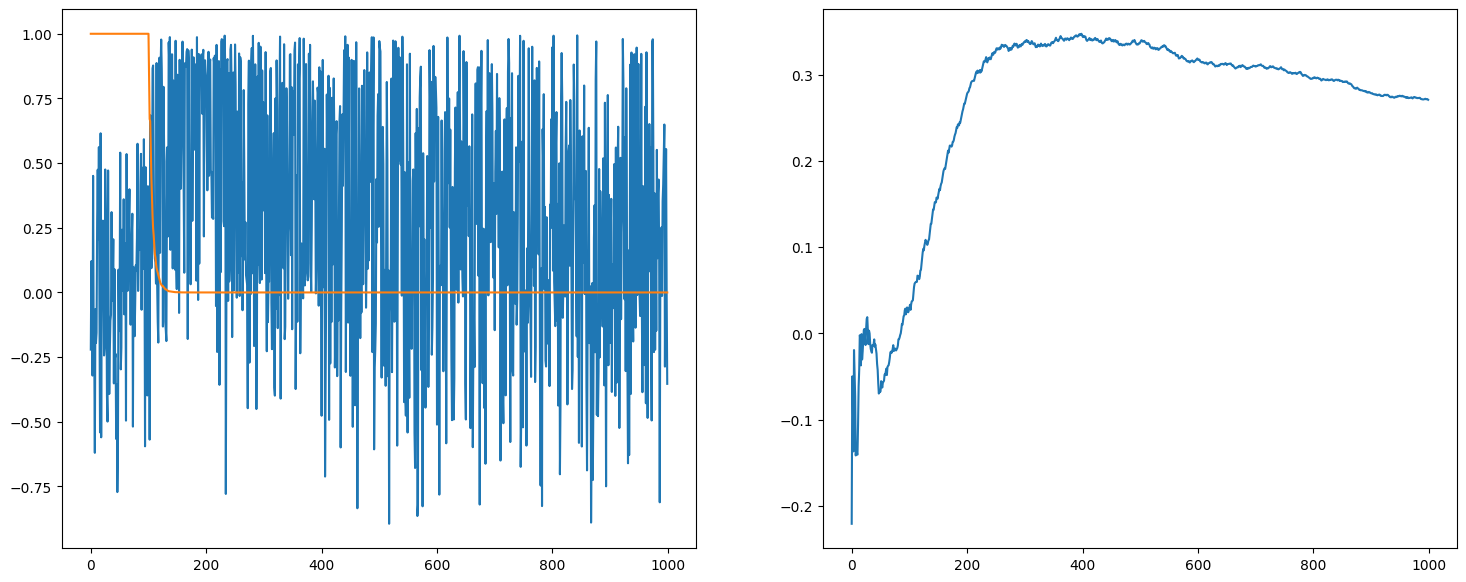

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
axs[0].plot(rewards)
axs[0].plot(epsilons)
axs[1].plot(np.cumsum(rewards)/range(1,len(rewards)+1))
plt.show()